# Data Analysis

Let's connect to the DB.

In [35]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Access db
conn = sqlite3.connect('bioprinting.db')

### Descriptive Analysis

#### Mean, Median and Standard Deviation

Mean Exposure Time: 25.09094893710278
Median Exposure Time: 28.5
Standard Deviation of Exposure Time: 12.746444397090245


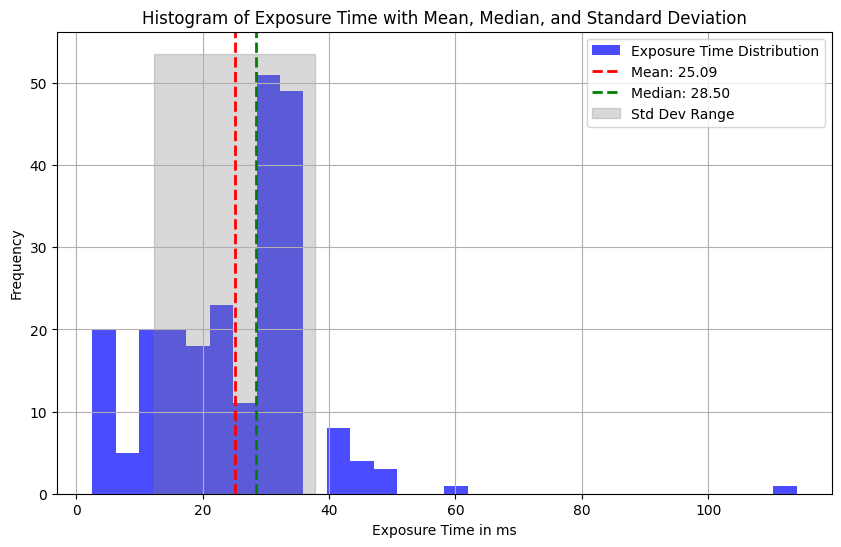

In [36]:
# SQL query to retrieve data
query = "SELECT exposureTime FROM slotSettings"

# Execute the query and store the result in a pandas DataFrame
df = pd.read_sql(query, conn)

# Calculate the mean, median, and standard deviation of the 'exposureTime' column
mean_exposure_time = df['exposureTime'].mean()
median_exposure_time = df['exposureTime'].median()
std_dev_exposure_time = df['exposureTime'].std()
print(f"Mean Exposure Time: {mean_exposure_time}")
print(f"Median Exposure Time: {median_exposure_time}")
print(f"Standard Deviation of Exposure Time: {std_dev_exposure_time}")

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(df['exposureTime'], bins=30, color='blue', alpha=0.7, label='Exposure Time Distribution')
plt.axvline(mean_exposure_time, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_exposure_time:.2f}')
plt.axvline(median_exposure_time, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_exposure_time:.2f}')
plt.fill_betweenx([0, plt.ylim()[1]], mean_exposure_time - std_dev_exposure_time, mean_exposure_time + std_dev_exposure_time, color='gray', alpha=0.3, label='Std Dev Range')
plt.title('Histogram of Exposure Time with Mean, Median, and Standard Deviation')
plt.xlabel('Exposure Time in ms')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

### Correlation Analysis

#### Spearman correlation

Spearman Correlation Coefficient: -0.26108251586005
P-value: 6.165855462943648e-09
The correlation is statistically significant.


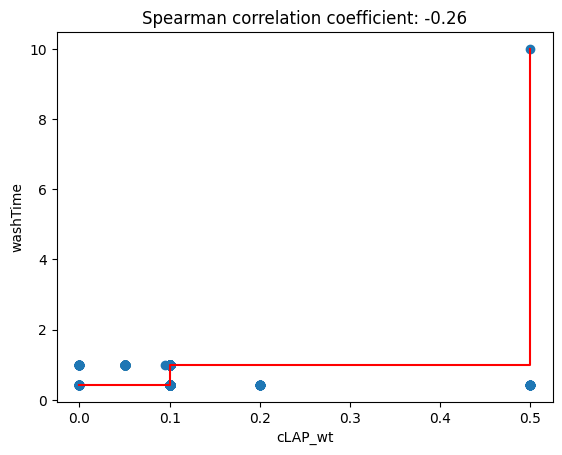

In [44]:
import scipy.stats as stats

# SQL query to retrieve and join data from bioInks and slotSettings tables
query = """
SELECT b.cLAP_wt, s.washTime
FROM bioInks b
JOIN slotSettings s ON b.logId = s.logId
"""

# Execute the query and store the result in a pandas DataFrame
df = pd.read_sql(query, conn)

# Remove rows where either 'cpolymer_v' or 'washTime' is NaN
df = df.dropna(subset=['cLAP_wt', 'washTime'])

# Perform Spearman correlation
spearman_corr, p_value = stats.spearmanr(df['cLAP_wt'], df['washTime'])

print(f"Spearman Correlation Coefficient: {spearman_corr}")
print(f"P-value: {p_value}")

# Interpreting the results
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")
    
plt.scatter(df['cLAP_wt'], df['washTime'])
plt.plot(np.sort(df['cLAP_wt']), np.sort(df['washTime']), color='red')
plt.title("Spearman correlation coefficient: {:.2f}".format(spearman_corr))
plt.xlabel("cLAP_wt")
plt.ylabel("washTime")
plt.show()

Association rule mining -> nicht nur numerische Daten

- Reliabilität prüfen
- wie gut und wie sicher wurden die Daten übertragen
- Neue OneNote dokumente anlegen und prüfen, wie gut funktioniert die software
- Auswertung, begründen, warum nicht reliabel

Welche Fragen an die Daten?